<a href="https://colab.research.google.com/github/gabrielcarcedo/Deep-Learning-en-vision-computacional-9-Escuela-de-Invierno/blob/main/Clasificaci%C3%B3n_CIFAR_10_9%C2%B0_Escuela_de_Invierno_IIMAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **9ª Escuela de Invierno en Ciencia de Datos y Sistemas Complejos**
---
## Taller: Deep learning en visión computacional
---
<table>
  <tr>
      <h4><b>ISC. Gabriel Carcedo Rodríguez</b>: <a href= "mailto:gabrielcarcedo@comunidad.unam.mx">gabrielcarcedo@comunidad.unam.mx</a>
      <br>
      <br>
      <b>Ing. Ismael Pérez Ruiz</b>: <a href= "mailto:iperez@modelo.edu.mx">iperez@modelo.edu.mx</a>
      <br>
      <br>
      <b>LCC. Victoria May Balam</b>: <a href= "mailto:victoria.mbalam@comunidad.unam.mx">victoria.mbalam@comunidad.unam.mx</a>
      <br>
      <br>
      <b>Dra. Nidiyare Hevia Montiel</b>: <a href= "mailto:nidiyare.hevia@iimas.unam.mx">nidiyare.hevia@iimas.unam.mx</a> </h4>
  </tr>
  <tr>
    <td width="60%" valign="top">
      <br>
      <br>
      <a href="https://www.pcic.unam.mx/">Posgrado en Ciencia e Ingeniería de la Computación</a>
    </td>
    <td width="40%" valign="top" style="text-align: center;">
      <a href="https://www.pcic.unam.mx/">
        <img src="https://pcic.posgrado.unam.mx/wp-content/uploads/Ciencia-e-Ingenieria-de-la-Computacion_color.png" alt="PCIC" style="width:100%; height:auto;">
      </a>
    </td>
  </tr>
</table>


# Clasificación CIFAR 10

CIFAR-10 es un conjunto de datos clásico de visión por computadora que contiene 60 000 imágenes a color de tamaño 32×32 píxeles, distribuidas en 10 clases de objetos cotidianos (aviones, autos, animales, etc.).
Se divide en 50 000 imágenes de entrenamiento y 10 000 de prueba, y es ampliamente utilizado para enseñar y evaluar redes neuronales convolucionales (CNNs).

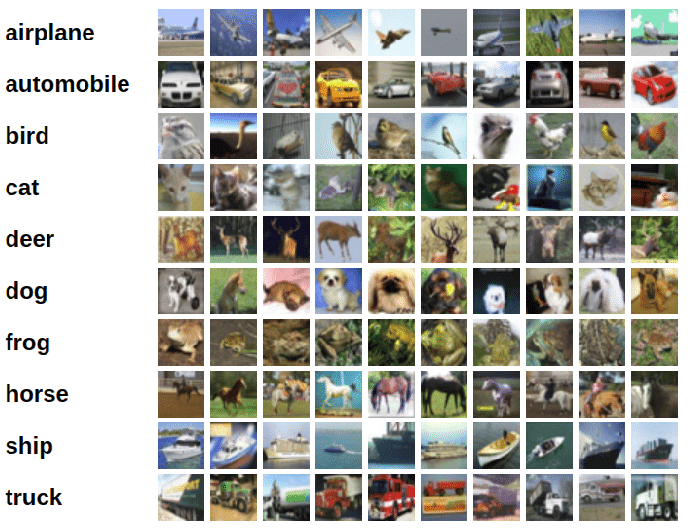

En esta libreta se utilizará CIFAR-10 para:

1.Cargar y visualizar imágenes a color

2.Entrenar una red neuronal convolucional (CNN) para clasificar las imágenes

3.Evaluar el desempeño del modelo mediante predicciones

4.Visualizar los mapas de características generados por las capas convolucionales

5.Analizar cómo la red abstrae la información visual desde píxeles hasta clases

El objetivo es entender cómo funciona una CNN internamente

# Carga y visualización de imágenes

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt


In [ ]:
cifar10=keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
class_names = ['Avión', 'Auto', 'Pájaro', 'Gato', 'Venado','Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

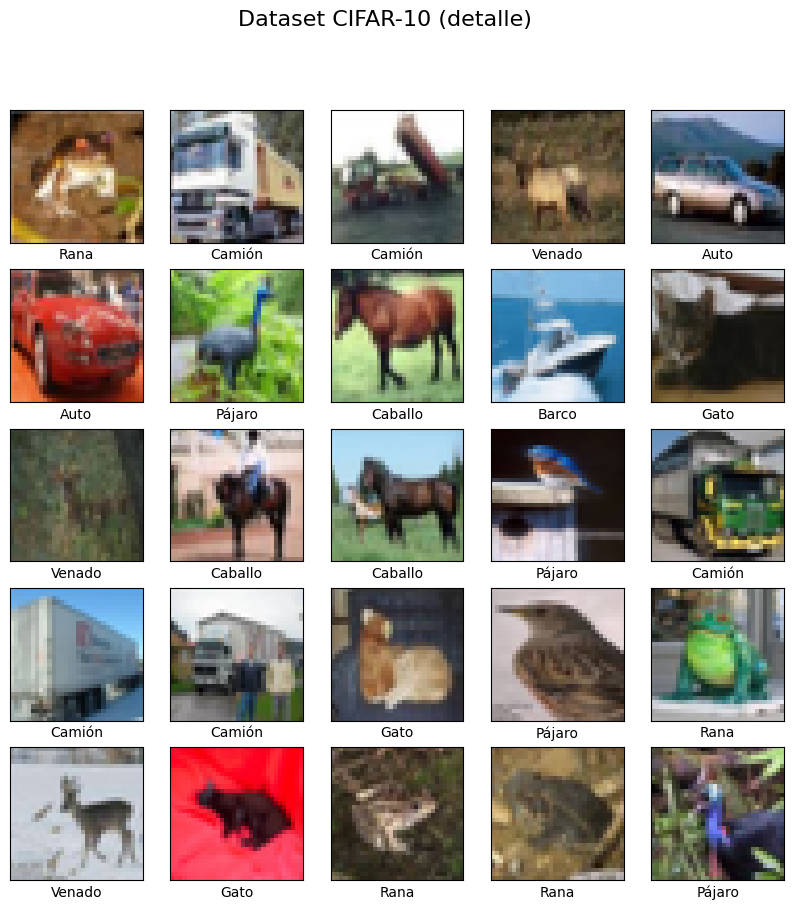

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("Dataset CIFAR-10 (detalle)", fontsize=16)
plt.show()

# Configuración de la red neuronal.
La red consta de tres capas convolucionales con activación ReLU, intercaladas con capas de max-pooling para reducir la dimensionalidad espacial y conservar las características más relevantes. El número de filtros aumenta de 32 a 64, permitiendo capturar patrones visuales cada vez más complejos.

Posteriormente, las características extraídas se aplanan y se procesan mediante una capa densa que integra la información para la toma de decisión. Finalmente, una capa de salida con función softmax produce las probabilidades de pertenencia a cada una de las 10 clases de CIFAR-10.

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3,3), activation='relu', name='conv_1')(inputs)
x = layers.MaxPooling2D((2,2), name='pool_1')(x)

x = layers.Conv2D(64, (3,3), activation='relu', name='conv_2')(x)
x = layers.MaxPooling2D((2,2), name='pool_2')(x)

x = layers.Conv2D(64, (3,3), activation='relu', name='conv_3')(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3556 - loss: 1.7468 - val_accuracy: 0.5611 - val_loss: 1.2214
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.5732 - loss: 1.1870 - val_accuracy: 0.5920 - val_loss: 1.1357
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6435 - loss: 1.0234 - val_accuracy: 0.6450 - val_loss: 1.0095
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6862 - loss: 0.9024 - val_accuracy: 0.6858 - val_loss: 0.8989
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7129 - loss: 0.8234 - val_accuracy: 0.6892 - val_loss: 0.8945


# Predicciones del modelo

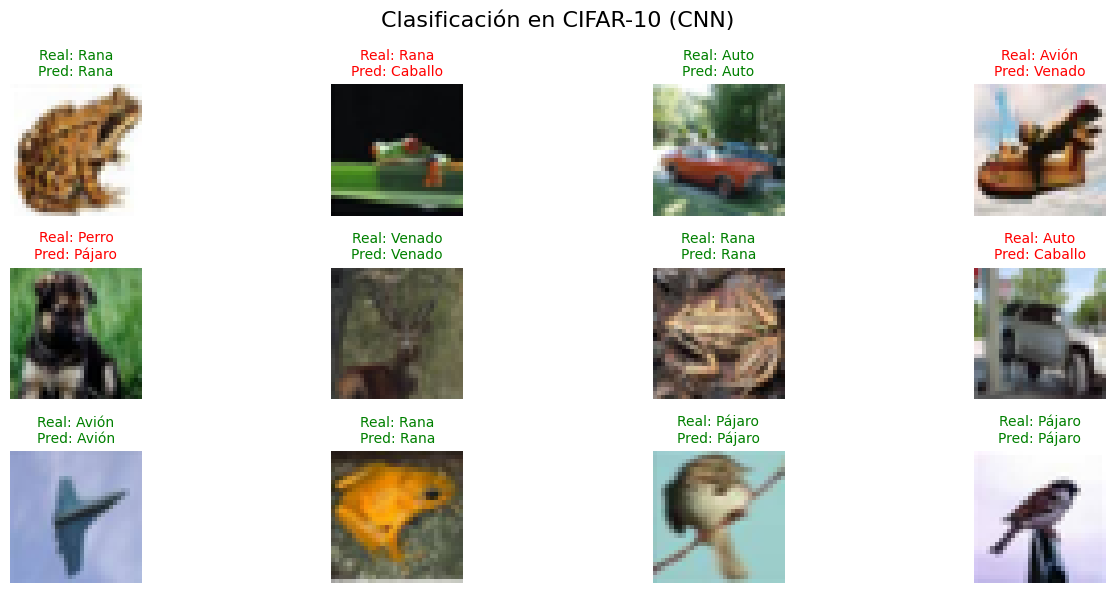

In [ ]:
num_images = 12
indices = np.random.choice(len(test_images), num_images, replace=False)

plt.figure(figsize=(14, 6))

for i, idx in enumerate(indices):
    img = test_images[idx]
    true_label = test_labels[idx][0]

    pred = model.predict(img[np.newaxis, ...], verbose=0)
    pred_label = np.argmax(pred)

    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')

    color = 'green' if pred_label == true_label else 'red'
    plt.title(
        f"Real: {class_names[true_label]}\n"
        f"Pred: {class_names[pred_label]}",
        color=color,
        fontsize=10
    )

plt.suptitle("Clasificación en CIFAR-10 (CNN)", fontsize=16)
plt.tight_layout()
plt.show()


# Visualización de mapa de características

In [ ]:
conv_layers = [
    layer for layer in model.layers
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D))
]

activation_model = keras.Model(
    inputs=model.input,
    outputs=[layer.output for layer in conv_layers]
)


In [ ]:
activations = activation_model.predict(img[np.newaxis, ...])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


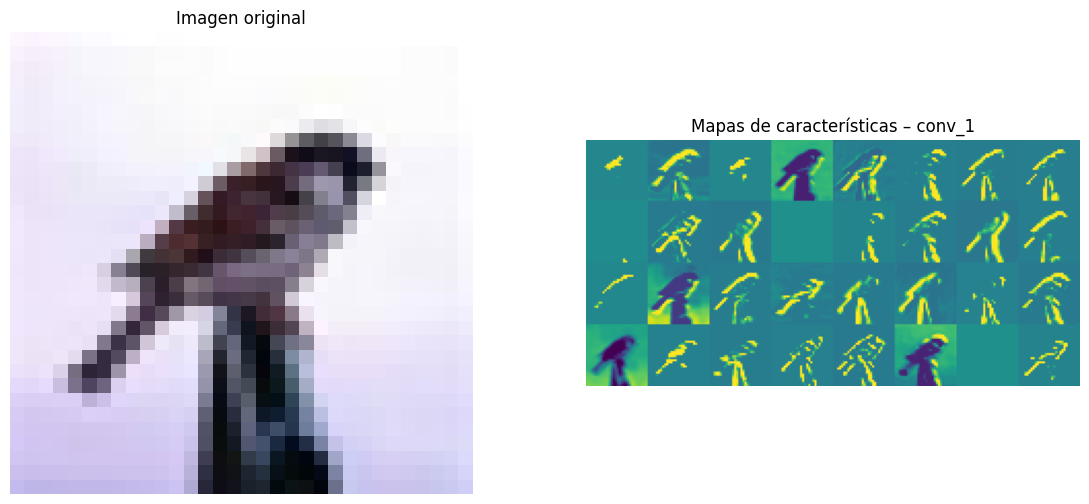

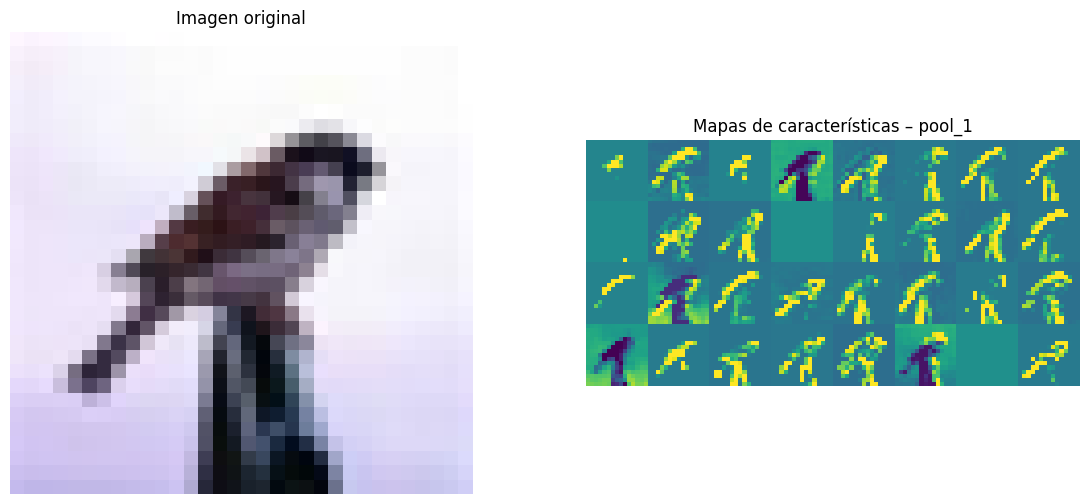

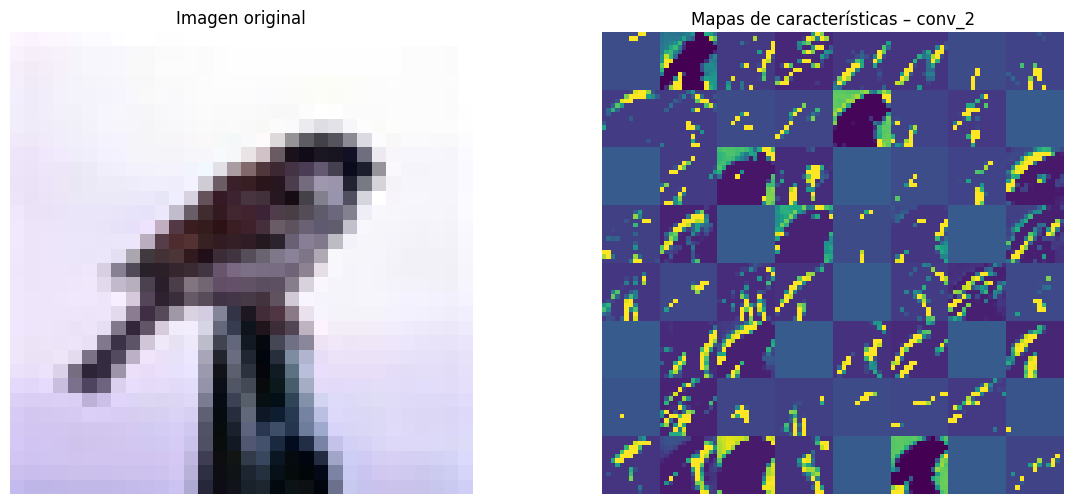

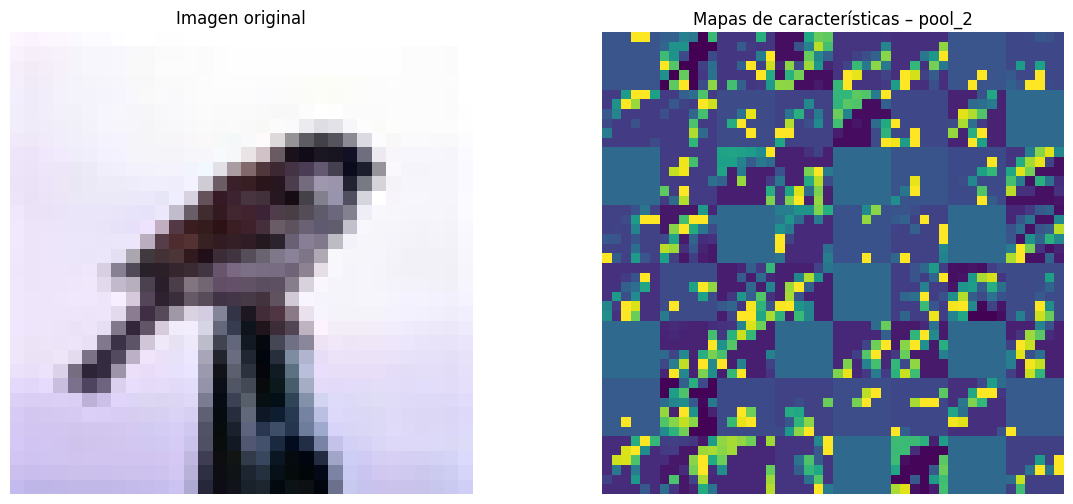

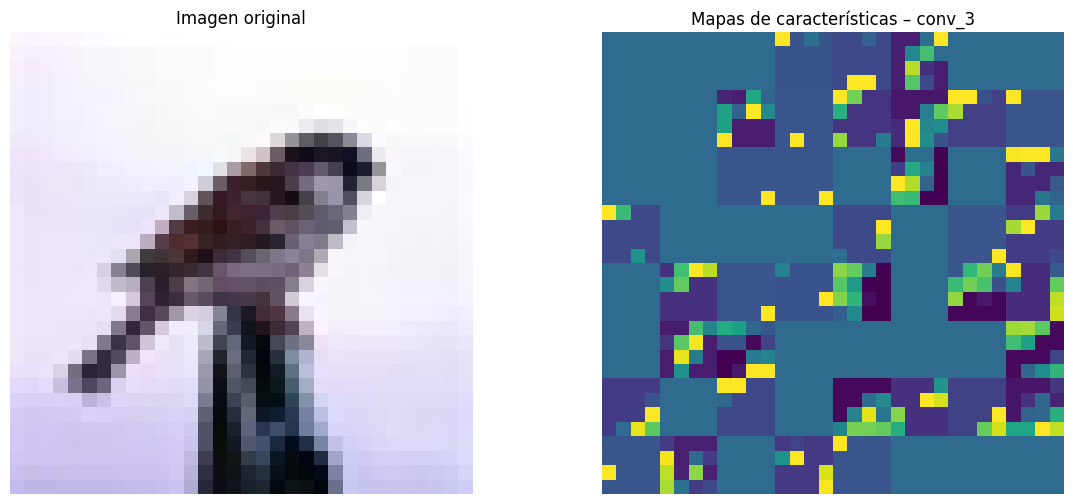

In [ ]:
for layer, activation in zip(conv_layers, activations):

    n_features = activation.shape[-1]
    size = activation.shape[1]

    n_cols = n_features // 8
    display_grid = np.zeros((size * n_cols, 8 * size))

    for col in range(n_cols):
        for row in range(8):
            channel = activation[0, :, :, col * 8 + row]
            channel -= channel.mean()
            channel /= (channel.std() + 1e-5)
            channel = channel * 64 + 128
            channel = np.clip(channel, 0, 255)

            display_grid[
                col * size : (col + 1) * size,
                row * size : (row + 1) * size
            ] = channel

    plt.figure(figsize=(14, 6))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Imagen original")
    plt.axis('off')

    # Mapas de características
    plt.subplot(1, 2, 2)
    plt.imshow(display_grid, cmap='viridis')
    plt.title(f"Mapas de características – {layer.name}")
    plt.axis('off')

    plt.show()

